In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras as ks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder 
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data.csv")

## Data Preprocessing

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [5]:
na = pd.notnull(df['Position'])

In [6]:
df = df[na]

In [7]:
df.isnull().sum()

Position           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [8]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [9]:
forward = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfield = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [10]:
df.loc[df["Position"] == "GK", "Position"] = 0

df.loc[df["Position"].isin(defender), "Position"] = 1

df.loc[df["Position"].isin(midfield), "Position"] = 2

df.loc[df["Position"].isin(forward), "Position"] = 3

In [11]:
df['Position'].unique()

array([3, 0, 2, 1], dtype=object)

In [12]:
df['Position'].value_counts()

2    6838
1    5866
3    3418
0    2025
Name: Position, dtype: int64

In [13]:
for_graph = df[['Position', 'Finishing', 'BallControl', 'Strength', 'GKReflexes']]

## EDA

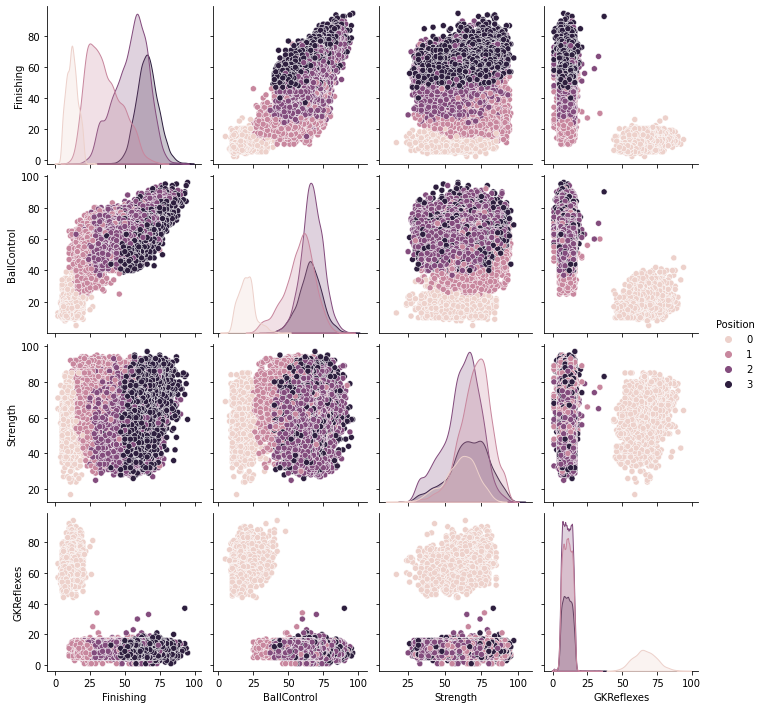

In [14]:
sns.pairplot(data=for_graph, hue='Position')

## Train, Test & Split

In [15]:
df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [16]:
y = df["Position"]
y_cat = to_categorical(y)
y

0        3
1        3
2        3
3        0
4        2
        ..
18202    2
18203    3
18204    3
18205    3
18206    2
Name: Position, Length: 18147, dtype: object

In [17]:
x = df.drop("Position", axis = 1)
x

,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [18]:
y.shape

(18147,)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=0)

## Feature Scaling

In [20]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.fit_transform(x_test))

## Model Building

In [21]:
model = Sequential()

### Input Layer

In [22]:
x_train.shape

(14517, 33)

In [23]:
model.add(Dense(33, input_shape = (33,), activation = "relu"))

### Hidden Layer 1

In [24]:
model.add(Dense(15, activation = "relu"))

### Hidden Layer 2

In [25]:
model.add(Dropout(0.2))

### Output Layer

In [26]:
model.add(Dense(4, activation = "softmax"))

## Configuring the learning process

In [27]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate = 0.01), metrics = ["accuracy"])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 33)                1122      
                                                                 
 dense_1 (Dense)             (None, 15)                510       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
Total params: 1,696
Trainable params: 1,696
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

In [29]:
model.fit(x_train, y_train, verbose=1, epochs=10)

Epoch 1/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3938 - accuracy: 0.8421
Epoch 2/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3337 - accuracy: 0.8659
Epoch 3/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3225 - accuracy: 0.8722
Epoch 4/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3156 - accuracy: 0.8698
Epoch 5/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3140 - accuracy: 0.8717
Epoch 6/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3121 - accuracy: 0.8721
Epoch 7/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3051 - accuracy: 0.8752
Epoch 8/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3053 - accuracy: 0.8766
Epoch 9/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3027 - accuracy: 0.8797
Epoch 10/10
454/454 [==============================] - 1s 1ms/step - loss: 0.2978 - accuracy: 0.8817

## Testing the model

In [30]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes

array([2, 3, 1, ..., 2, 2, 1], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

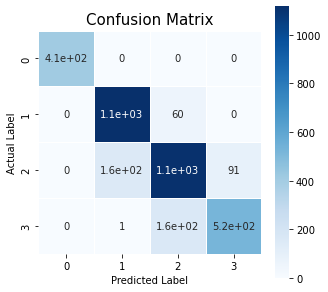

In [31]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', size = 15)